# UTSA CS 3793/5233: Assignment-4

Summer 2021


**Kalban - Maahir - (ert547)**






## Learning Objectives

*   Deep Learning
*   Computer Vision - Convolutional Neural Network
*   Natrual Language Processing - Recurrent Neural Network


## General Information

The base structure and comments are provided on what should be done. You are free to use any code from online sources, but please cite the source properly. Also, you are supposed to create/train the DL model and not use pre-trained models.

**TIPS** while working on this assignment:


*   You will have to keep on updating the model to improve accuracy. Hence, all except the first step (loading the data) would be repeated multiple times. i.e. repeat -- model creation, training & testing.
*   Training a Deep Learning model on real-world datasets and obtain decent accuracy is time consuming. For this assignment, it may take at least 40-60 min, if not more, to train the complete data and get around 35% testing accuracy. Hence, have enough time planned out for finishing the assignment.
*   Because of the large training time, it is impossisble to train each student's model. Hence, you will be required to **save the weights** in a file. These weights can then be loaded for testing purposes. More information is provided in a TensorFlow tutorial [here](https://www.tensorflow.org/tutorials/keras/save_and_load).
*   Please refer to the [TensorFlow Keras API](https://www.tensorflow.org/api_docs/python/tf/keras) for selecting the *'activation function', 'loss', 'optimizer' & 'metrics'*. At least use 'accuracy' as one of the 'metrics'.




##Import Libraries

Write all the import statements here.

In [3]:
# import all required libraries
from __future__ import print_function
from tensorflow import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools
from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline


Mounted at /content/drive


# Computer Vision - CNN

The goal of this task is to get hands-on experience in developing, training and testing **Convolutional Neural Network** for the Computer Vision task of Object/Image Classification.

## Load/Prepare Data

(20 points)

In this assignment, will work with the well-known **CIFAR-100 dataset**. The dataset consists of 60000 32x32 color images, which belong to 100 classes, with 600 images per class. There are 50000 training images (500 per class) and 10000 test images (100 per class). The 100 classes in the dataset are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). More information about the dataset can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html). Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

In this section, you will write code for the following: 

*   Load the CIFAR-100 dataset
*   Prepare the data to be used for the DL model creation and training
*   Visualize the data by plotting 100 random images, one each for the 100 classes



In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 100  # Number of class for the dataset
epochs = 50
data_augmentation = False

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

169017344/169001437 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Load the data - training as well as testing


# Prepare the data that can be used by the next step - creating and training the DL model


# The data from TensforFlow and Keras will only have integer class labels. Each of those 100 integer class labels correspond to the following names, in the correct order
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

# These are the string labels for the 20 superclasses. You may not need to use this at all, just provided here for reference.
coarse_labels = ['aquatic_mammals', 'fish', 'flowers', 'food_containers', 'fruit_and_vegetables', 'household_electrical_devices', 'household_furniture', 'insects', 'large_carnivores', 'large_man-made_outdoor_things', 'large_natural_outdoor_scenes', 'large_omnivores_and_herbivores', 'medium_mammals', 'non-insect_invertebrates', 'people', 'reptiles', 'small_mammals', 'trees', 'vehicles_1', 'vehicles_2']



In [ ]:
# Visualize the data by plotting 100 random images, one each for the 100 classes
# Draw 10 images in one row, 10 rows total



## CNN Model Creation

(20 points)

In this section, you will write code for the following:

*   Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')
*   Print the DL model summary

In [ ]:
# Create a DL model for Computer Vision - Convolutional Neural Network (Use *TensorFlow* and *keras*, as shown in the example code in the lecture for 'deep-learning')



In [ ]:
# Print the DL model summary



In [ ]:
#define the convnet
model = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# a softmax classifier
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        1

## Training

(20 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training CIFAR-100 data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/", to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/cifar/"



In [ ]:
# Train/fit the DL model using the training CIFAR-100 data



In [ ]:
# Plot the training/validation accuracy and loss



In [ ]:
cp_callback = keras.callbacks.ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/cifar/",
                                                 save_weights_only=True)

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:

if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              callbacks=[cp_callback],
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                    batch_size=batch_size),
                                    epochs=epochs,
                                    validation_data=(x_test, y_test),
                                    workers=4,
                                    callbacks=[cp_callback])

Not using data augmentation.
Epoch 1/50
1563/1563 [==============================] - 294s 177ms/step - loss: 4.4853 - accuracy: 0.0262 - val_loss: 3.8786 - val_accuracy: 0.1286
Epoch 2/50
1563/1563 [==============================] - 274s 175ms/step - loss: 3.9080 - accuracy: 0.1043 - val_loss: 3.6340 - val_accuracy: 0.1615
Epoch 3/50
1563/1563 [==============================] - 276s 177ms/step - loss: 3.6304 - accuracy: 0.1488 - val_loss: 3.4227 - val_accuracy: 0.1988
Epoch 4/50
1563/1563 [==============================] - 267s 171ms/step - loss: 3.4426 - accuracy: 0.1826 - val_loss: 3.2610 - val_accuracy: 0.2267
Epoch 5/50
1563/1563 [==============================] - 266s 170ms/step - loss: 3.2971 - accuracy: 0.2105 - val_loss: 3.0818 - val_accuracy: 0.2571
Epoch 6/50
1563/1563 [==============================] - 264s 169ms/step - loss: 3.1891 - accuracy: 0.2270 - val_loss: 3.0043 - val_accuracy: 0.2686
Epoch 7/50
1563/1563 [==============================] - 266s 170ms/step - loss: 3.0

In [ ]:
save_dir = os.path.join(os.getcwd(), '/content/drive/My Drive/Colab Notebooks/cifar')
model_name = 'keras_cifar100'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save_weights(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /content/drive/My Drive/Colab Notebooks/cifar1/keras_cifar100 
313/313 [==============================] - 12s 38ms/step - loss: 2.1256 - accuracy: 0.4475
Test loss: 2.1255838871002197
Test accuracy: 0.44749999046325684


In [ ]:
model.fit(x_train, y_train, epochs=1, batch_size=32, callbacks=[cp_callback])

 105/1563 [=>............................] - ETA: 3:54 - loss: 2.2585 - accuracy: 0.4259

KeyboardInterrupt: ignored

In [ ]:
model.load_weights('/content/drive/My Drive/Colab Notebooks/cifar/')

In [ ]:
model.evaluate(x_test,y_test, batch_size=1)

10000/10000 [==============================] - 48s 5ms/step - loss: 2.1256 - accuracy: 0.4475


[2.1255829334259033, 0.44749999046325684]

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/cifar/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the CIFAR-100 test dataset. Accuracy value should be printed. Please visit this [website](https://benchmarks.ai/cifar-100) for the benchmark performances of different techniques on the CIFAR-100 dataset.

This section of the code should be able to run independently from the **training** section, i.e. run this section directly after creating the model. 

In [ ]:
# Re-initialize the model



In [ ]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/cifar/"



In [ ]:
# Evaluate the trained DL model on the CIFAR-100 test dataset



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


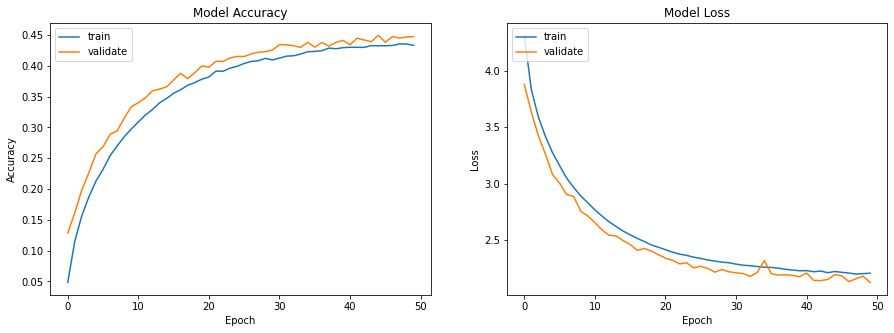

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 12s 38ms/step - loss: 2.1256 - accuracy: 0.4475
Test loss: 2.1255838871002197
Test accuracy: 0.44749999046325684


In [ ]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)
    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label') 
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data=None, fmt="d", threshold=None):
    """
    A function to annotate a heatmap.
    """
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment="center",
                                 color="white" if data[i, j] > thresh else "black")
            texts.append(text)

    return texts

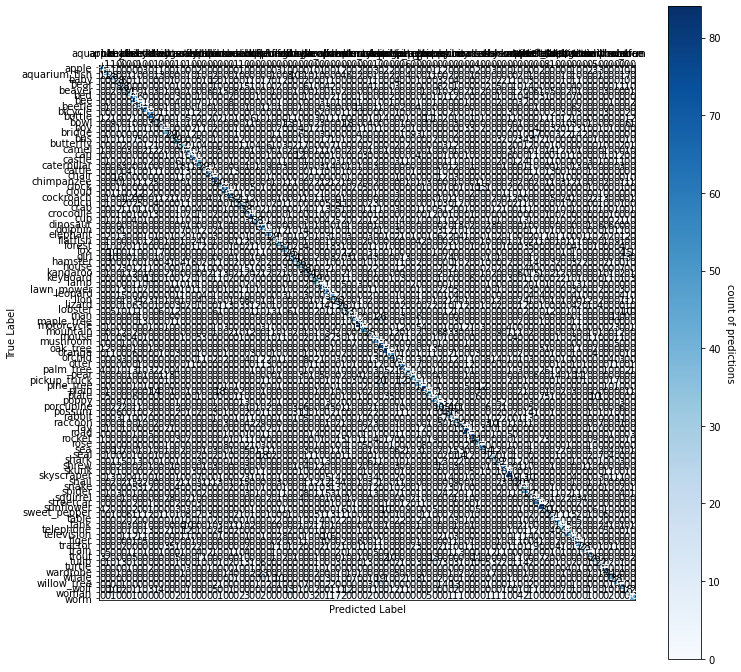

In [ ]:
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

fig, ax = plt.subplots(figsize=(12,12))
im, cbar = heatmap(cm, fine_labels, fine_labels, ax=ax,
                   cmap=plt.cm.Blues, cbarlabel="count of predictions")
texts = annotate_heatmap(im, data=cm, threshold=thresh)

#fig.tight_layout()
plt.show()

Check the predictions

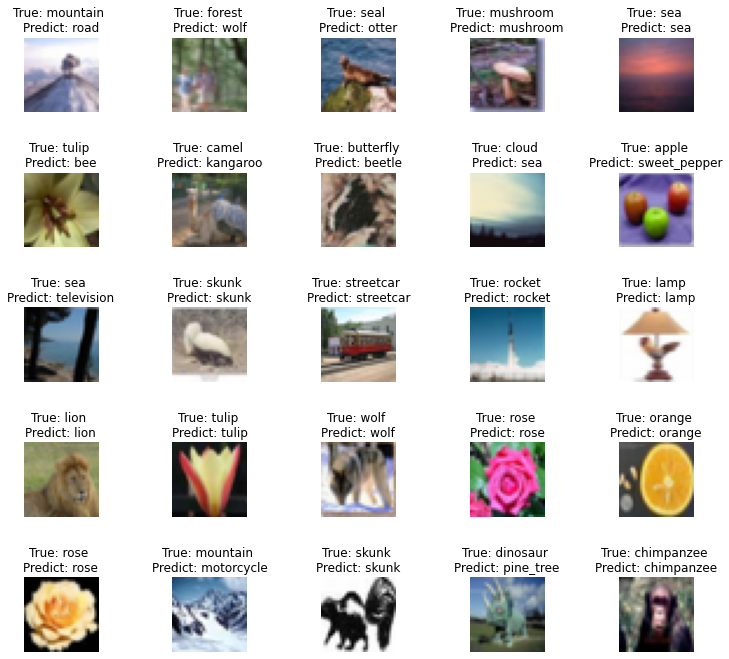

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (fine_labels[Y_true[i]], fine_labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

Testing the model with the test images in the test set.

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3,3))
    test_image = np.expand_dims(x_test[number], axis=0)
    test_result = model.predict_classes(test_image)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title("Predicted: {} \nTrue Label: {}".format(fine_labels[dict_key],
                                                      fine_labels[Y_true[number]]))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


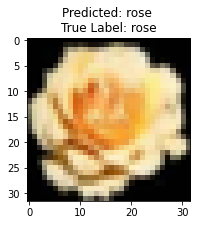

In [ ]:
show_test(20)

## Model Performance - Accuracy (Extra Credit)

(10 points)

For the models submitted, we will look at the accuracy values on the test data. Credit will be allocated based on how the performance is for your model. The submission with the highest accuracy value will get the highest credit and the one with the lowest accuracy value will get the lowest credit.

# Natural Language Processing - RNN

The goal of this task is to get hands-on experience in developing, training and testing **Recurrent Neural Network** for the Natural Language Processing task of Sentiment Analysis / Text Classification. In this part, you will work with the well-known **Reuters newswire classification dataset**. The dataset consists of newswires from Reuters, labeled over 46 topics. More information about the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection) or [here](https://keras.io/api/datasets/reuters/). The Keras dataset is a cleaned and organized version of the original dataset and consists of 11,228 newswires (8982 training and 2246 testing). The goal is to classify a newswire into one of the 46 output catergories.


## Load/Prepare Data

(20 points)

In this section, you will write code for the following: 

*   Load the Reuters dataset - use the Keras version
 *   Select the vocabulary size while loading the data
 *   The data will be loaded as integer representations for each word
*   Prepare the data to be used for the next steps
 *   Each data entry (newswire) can be of different lengths
 *   Make each newswire consistent - same number of words
 *   'Pad' words (say 0) to get to the standard length or remove words

In [19]:
# dependencies :
from tensorflow import keras
import numpy as np 
import pandas as pd 
from keras.datasets import reuters
import matplotlib.pyplot as plt  
from matplotlib import style
style.use('ggplot')
import collections
import nltk
from nltk.corpus import stopwords


from collections import defaultdict
sns.set(rc={'figure.figsize':(11.7,8.27)})
from IPython.display import Math

In [11]:
# Load the Reuters dataset - use the Keras version
#   Select the vocabulary size while loading the data
#   The data will be loaded as integer representations for each word


(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))


8982
2246


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [12]:
# Prepare the data to be used for the next steps
#   Each data entry (newswire) can be of different lengths
#   Make each newswire consistent - same number of words
#   'Pad' words (say 0) to get to the standard length or remove words

assert(len(x_train)==len(y_train))    #to make sure dataset is loaded correctly
assert(len(x_test)==len(y_test))
print('Number of Training Samples: {}'.format(len(y_train)))
print('Number of Test Samples: {}'.format(len(y_test)))
print('Number of classes: ', np.max(y_train)+1)        # plus one because indexing of categories starts at 0

Number of Training Samples: 8982
Number of Test Samples: 2246
Number of classes:  46


Text preprocessing



Save the newswires dataset in text format
Remove some stopwords further
Apply some text pre processing techniques - Stemming, Lemmatzing, tf-idf, word embeddings
Save different modules of preprocessed data (e.g. module1 - stemmed + lemmatized, module2 - tf-idf etc)
Later experiment with all modules of the datasets and check metrics[Confusion Matrix, cross-entropy loss].

In [13]:
word_to_index = reuters.get_word_index(path="reuters_word_index.json") #Getting the word with their index using the inbuilt function

565248/550378 [==============================] - 0s 0us/step


In [14]:
word_to_index = reuters.get_word_index(path="reuters_word_index.json") #Getting the word with their index using the inbuilt function
# dictionary {'WORD' : INDEX}  
'''This functions returns 'n' newswires as text'''
def get_newswire(n,X):
    index_to_word = {}
    for key, value in word_to_index.items():     # to loop over the dict object
        index_to_word[value] = key          # appending the dictionary {INDEX : 'WORD'}  (inverse dictionary!)
    wires = []
    #myDict = defaultdict(dict)
    for i in range(n):
        wire =(' '.join(index_to_word[x] for x in X[i]))
        wires.append(wire)
    return wires
wires_train = get_newswire(len(x_train),x_train)
wires_test = get_newswire(len(x_test),x_test)
print('The first news wire from training set is:')
wires_train[0]

The first news wire from training set is:


'the of of mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs'

In [17]:
'''Removing stopwords'''
from nltk.tokenize import word_tokenize 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 
def remove_stop_words(X):
    filtered_wires =[]
    for i in range(len(X)):
        word_tokens = word_tokenize(X[i] )
        filtered_sentence = [w for w in word_tokens if not w in stop_words] 
        filtered_wires.append(filtered_sentence)
    return filtered_wires
wires_train= remove_stop_words(wires_train)
wires_test=remove_stop_words(wires_test)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
from keras.preprocessing.text import Tokenizer
max_words = 15000
num_classes = 46
tokenizer = Tokenizer(num_words=max_words)
x_train_final = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test_final = tokenizer.sequences_to_matrix(x_test, mode='binary')

y_train_final = keras.utils.to_categorical(y_train, num_classes)
y_test_final = keras.utils.to_categorical(y_test, num_classes)

print('Sample final x value :')
print(x_train_final[0])

Sample final x value :
[0. 1. 1. ... 0. 0. 0.]


In [21]:
print('Sample from Y values -> Categorical one hot encoding')
print(y_train_final[0])

Sample from Y values -> Categorical one hot encoding
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [22]:
print('The shape of X_train is:')
print(x_train_final.shape)
print('The shape of y_train is')
print(y_train_final.shape)

The shape of X_train is:
(8982, 15000)
The shape of y_train is
(8982, 46)


Analyzing the class distributions

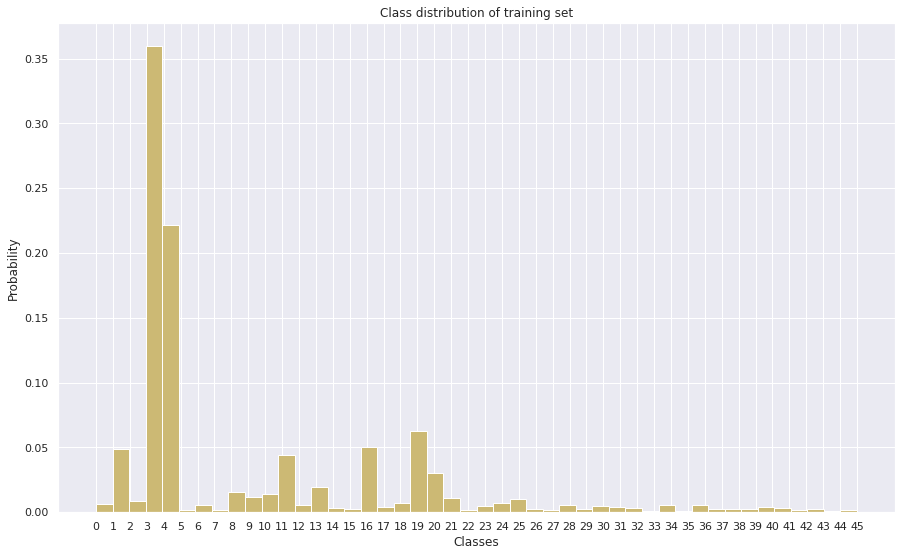

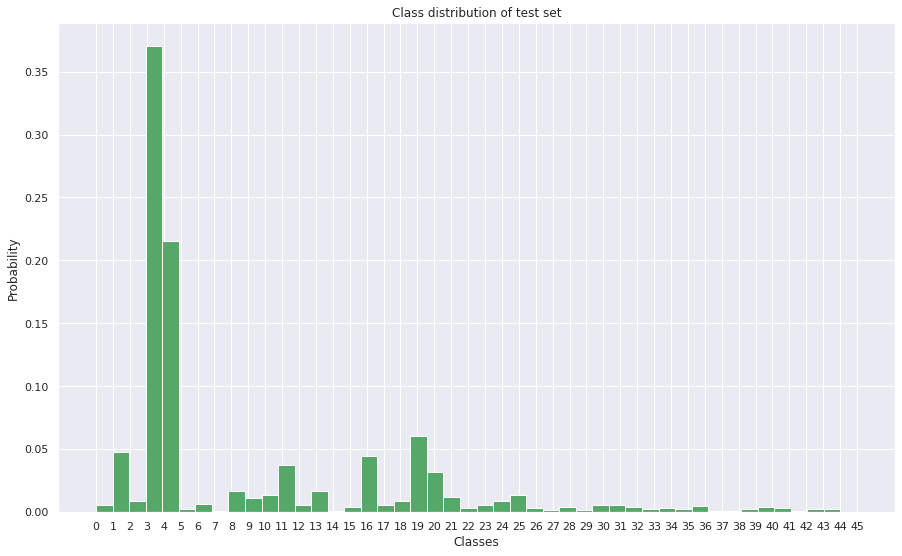

,Top classes,Frequency of samples
0,3,3159
1,4,1949
2,19,549
3,16,444
4,1,432
5,11,390
6,20,269
7,13,172
8,8,139
9,10,124


In [24]:
plt.figure(figsize=(15,9))
plt.hist(y_train, bins=46, density=True, facecolor='y')
plt.xticks(np.arange(0,46))
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Class distribution of training set')
plt.show()

plt.figure(figsize=(15,9))
plt.hist(y_test, bins=46, density=True, facecolor='g')
plt.xticks(np.arange(0,46))
plt.xlabel('Classes')
plt.ylabel('Probability')
plt.title('Class distribution of test set')
plt.show()

def most_common_classes(n,Y_TRAIN,Y_TEST):
    '''This function return the top Nm ost common classes'''
    c= collections.Counter(Y_TRAIN)
    d=collections.Counter(Y_TEST)
    classes =[]
    frequency =[]
    
    for i in range(len(c.most_common(n))):
        classes.append(c.most_common(n)[i][0])
        frequency.append(c.most_common(n)[i][1])
    df =pd.DataFrame(data={'Top classes':classes,'Frequency of samples':frequency})
    
    
    return df
  

most_common_classes(10,y_train,y_test)

Further analysis

In [25]:

print('The number of unique words in this corpora : ',len(word_to_index))
index_to_word = {}
for key, value in word_to_index.items():     # to loop over the dict object
    index_to_word[value] = key


def most_common_words(n):
    '''As we know that the index is the rank of the word based on Frequency, lets print out
a few most common occurring words'''
    top_words=[]
    for i in range(1,n):
        top_words.append(index_to_word[i])
    return  print('The most common {} words are:'.format(n),top_words)

most_common_words(50)

The number of unique words in this corpora :  30979
The most common 50 words are: ['the', 'of', 'to', 'in', 'said', 'and', 'a', 'mln', '3', 'for', 'vs', 'dlrs', 'it', 'reuter', '000', '1', 'pct', 'on', 'from', 'is', 'that', 'its', 'cts', 'by', 'at', 'year', 'be', 'with', '2', 'will', 'was', 'billion', 'he', 'u', 's', 'net', 'has', 'would', 'an', 'as', '5', 'not', 'loss', '4', '1986', 'company', 'which', 'but', 'this']


Below I define a function which gives me dataset which contains only the top 'n' classes.

In [26]:
def get_data(X,Y,Y_TEST,num_classes):
    
###########################################################################################
#   This function returns form the overall data only those which belong to top N classes
#   Important: for X, input->Binary coded fixed length array
#   for Y, input-> the one **NOT** one-hot encoded'''
###########################################################################################
    x_train=[]
    y_train=[]
    top_n_classes=most_common_classes(num_classes,Y,Y_TEST)['Top classes']
    XY= []
    for i in range(len(X)):
        xy = np.hstack((X[i],Y[i]))
        XY.append(xy)
    for i in range(len(XY)):
        if np.isin(XY[i][-1],top_n_classes)==True:
            x_train.append(XY[i][:15000])
            y_train.append(XY[i][-1])
    return (x_train,y_train)

x_train_i,y_train_i=get_data(x_train_final,y_train,y_test,num_classes=10)
x_test_i,y_test_i=get_data(x_test_final,y_test,y_test,num_classes=10)

In [27]:
print('Top ten classes remianing in the dataset:')
np.unique(y_train_i)

Top ten classes remianing in the dataset:


array([ 1.,  3.,  4.,  8., 10., 11., 13., 16., 19., 20.])

In [28]:
print('From Top TEN classes->')
print('Samples left in train set:',len(x_train_i),'out of',len(x_train))
print('Samples left in test set:',len(x_test_i),'out of',len(y_test))

From Top TEN classes->
Samples left in train set: 7627 out of 8982
Samples left in test set: 1883 out of 2246



 Dimentionality reduction :
 Principal component analysis -> For top ten classes

In [30]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train_i)

In [31]:

XY= []
for i in range(len(X_pca)):
    xy = np.hstack((X_pca[i],y_train_i[i]))
    XY.append(xy)

In [32]:

finalDf=pd.DataFrame(XY,columns=['principal component 1','principal component 2','target'])
finalDf.head()

,principal component 1,principal component 2,target
0,-0.242751,0.366264,3.0
1,-0.356352,-1.414445,4.0
2,-1.869542,2.283469,3.0
3,1.842961,-0.207894,4.0
4,0.666905,-1.453459,4.0


Viazualizing PCA :

## RNN Model Creation

(20 points)

In this section, you will write code for the following:

*   Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU
*   Print the DL model summary

Train a Neural network Classifier to classify the news wires

In [35]:

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, Flatten
from keras.layers import Embedding, SimpleRNN
from keras.models import model_from_json
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


Closed set classification

In [36]:
'''Funciton plots accuracy and loss graph'''
def plot_metrics(model_history,modelid):
    
    pd.Series(model_history.history['loss']).plot(logy=True)
    plt.xlabel("Epoch")
    plt.title('Loss of train set->model {}'.format(modelid))
    plt.ylabel("Loss")
    plt.show()
   
    pd.Series(model_history.history['acc']).plot(logy=True)
    plt.xlabel("Epoch")
    plt.title('Accuracy of train set->model {}'.format(modelid))
    plt.ylabel("Accuracy")
    plt.show()
    
    
'''This function returns the predicted classes form the indices returned by model.predict'''

def pred_to_class1(model,x_test,y_test,num_classes):
    top_n_classes=most_common_classes(num_classes,y_train_i,y_test_i)['Top classes']  
    top_n_classes=np.sort(np.asarray(top_n_classes))
    y_proba = model.predict(x_test)
    y_classes = y_proba.argmax(axis=-1)
    pred= []
    for i in range(len(y_classes)):
        pred.append(top_n_classes[y_classes[i]])
    return pred

In [38]:
'''
Here I tokenize the Y values to use it finally for training
'''
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y_train_i)
print('Unique classes are',lb.classes_)

y_train_i_encoded =lb.transform(y_train_i)

Unique classes are [ 1.  3.  4.  8. 10. 11. 13. 16. 19. 20.]


In [40]:

lb = preprocessing.LabelBinarizer()       
lb.fit(y_test_i)
print('Unique classes in test set are',lb.classes_)

y_test_i_encoded =lb.transform(y_test_i)

Unique classes in test set are [ 1.  3.  4.  8. 11. 13. 16. 19. 20. 25.]


In [41]:
''' 
The final data containing only 10 classes have the following variable names ->

x_train_i  , y_train_i
x_test_i_encoded , y_test_i_encoded


'''
x_train_i =np.asarray(x_train_i)
y_train_i =np.asarray(y_train_i)
x_test_i =np.asarray(x_test_i)
y_test_i =np.asarray(y_test_i)
print('shape of x_train :',x_train_i.shape )
print('shape of y_train :',y_train_i_encoded.shape )
print('shape of x_test :',x_test_i.shape )
print('shape of y_test :',y_test_i_encoded.shape )
print('Unique top ten classes in y->,',np.unique(y_train_i))

shape of x_train : (7627, 15000)
shape of y_train : (7627, 10)
shape of x_test : (1883, 15000)
shape of y_test : (1883, 10)
Unique top ten classes in y->, [ 1.  3.  4.  8. 10. 11. 13. 16. 19. 20.]


In [67]:
# Create a DL model for Natural Language Processing - Recurrent Neural Network / LSTM / GRU

model3 = Sequential()
model3.add(Dense(512, input_shape=(max_words,)))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(256, input_shape=(max_words,)))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(128, input_shape=(max_words,)))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(64, input_shape=(max_words,)))
model3.add(Activation('relu'))
model3.add(Dropout(0.3))
model3.add(Dense(10))
model3.add(Activation('softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model3.summary())




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               7680512   
_________________________________________________________________
activation_20 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_21 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)              

Figure shows the confusion matrix for the Train set.


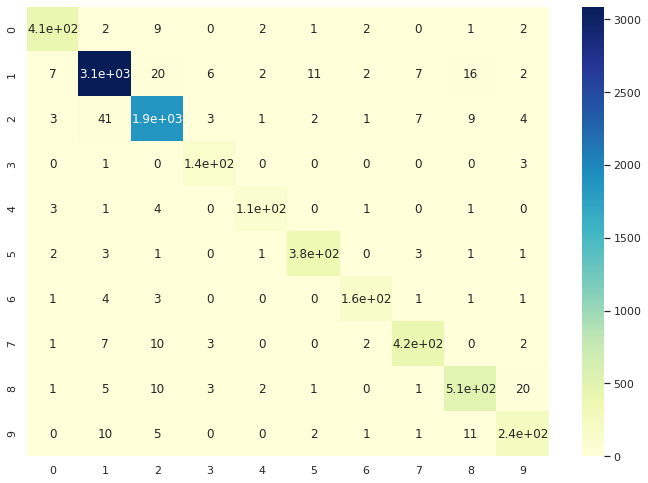

In [70]:

pred_3_train=pred_to_class1(model3,x_train_i,y_train_i,num_classes=10)
matrix = confusion_matrix(y_train_i,pred_3_train)
ax = sns.heatmap(matrix,cmap="YlGnBu",annot=True)
print("Figure shows the confusion matrix for the Train set.")

## Training

(20 points)

In this section, you will write code to do the following:

*   Train/fit the DL model using the training Reuters data
*   Plot the training/validation accuracy and loss
*   *Save the trained model weights* in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load)), to be used for the testing phase


In [ ]:
# Set the model checkpoints to be saved in a folder in the google drive at at location "/content/drive/My Drive/Colab Notebooks/reuters/"
# Save weights
model_json = model3.to_json()
with open("model3.json", "w") as json_file:
     json_file.write(model_json)
model3.save_weights("model3.h5")





In [69]:
# Train/fit the DL model using the training Reuters data
batch_size = 32
epochs = 20

history = model3.fit(x_train_i, y_train_i_encoded, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)



Epoch 1/20
215/215 [==============================] - 13s 56ms/step - loss: 1.3261 - accuracy: 0.5934 - val_loss: 0.5808 - val_accuracy: 0.8427
Epoch 2/20
215/215 [==============================] - 11s 53ms/step - loss: 0.5190 - accuracy: 0.8679 - val_loss: 0.5665 - val_accuracy: 0.8637
Epoch 3/20
215/215 [==============================] - 12s 54ms/step - loss: 0.3139 - accuracy: 0.9284 - val_loss: 0.6597 - val_accuracy: 0.8650
Epoch 4/20
215/215 [==============================] - 12s 54ms/step - loss: 0.2323 - accuracy: 0.9445 - val_loss: 0.7147 - val_accuracy: 0.8663
Epoch 5/20
215/215 [==============================] - 12s 54ms/step - loss: 0.1975 - accuracy: 0.9532 - val_loss: 0.6878 - val_accuracy: 0.8585
Epoch 6/20
215/215 [==============================] - 12s 55ms/step - loss: 0.1601 - accuracy: 0.9586 - val_loss: 0.7780 - val_accuracy: 0.8493
Epoch 7/20
215/215 [==============================] - 12s 55ms/step - loss: 0.1510 - accuracy: 0.9593 - val_loss: 0.9724 - val_accuracy:

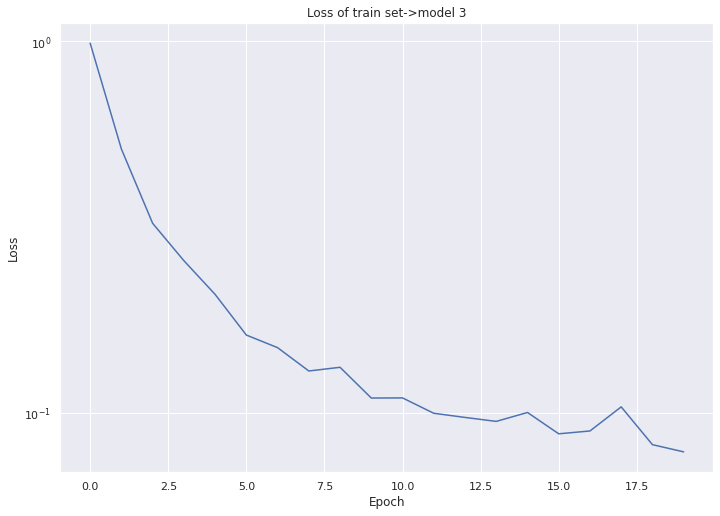

KeyError: ignored

In [76]:
# Print the DL model summary
plot_metrics(history,modelid=3)


Figure shows the confusion matrix for the test set.


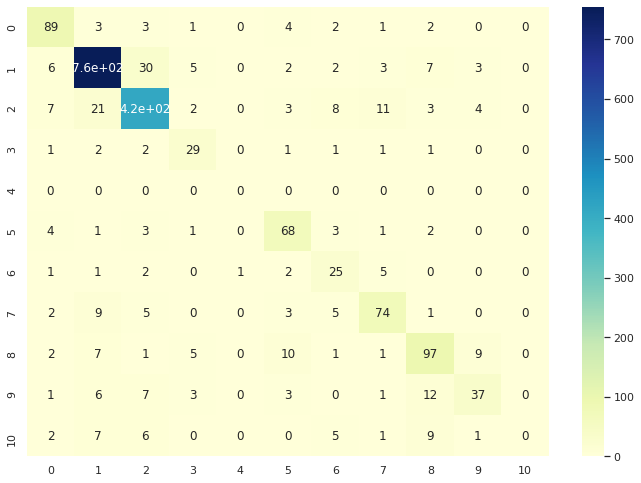

In [65]:

pred_3=pred_to_class1(model3,x_test_i,y_test_i,num_classes=10)
matrix = confusion_matrix(y_test_i,pred_3)
ax = sns.heatmap(matrix,cmap="YlGnBu",annot=True)
print("Figure shows the confusion matrix for the test set.")

## Testing/Evaluation

(15 points)

In this section, you will write code for the following:

*   Re-initialize the model
*   Load the model weights that were saved at "/content/drive/My Drive/Colab Notebooks/reuters/" ([code reference](https://www.tensorflow.org/tutorials/keras/save_and_load))
*   Evaluate the trained DL model on the Reuters test dataset. Accuracy value should be printed.

This section of the code should be able to run independently from the **training** section, i.e., run this section directly after creating the model.

In [72]:
# Re-initialize the model


In [77]:
# Load the model weights that were saved at - "/content/drive/My Drive/Colab Notebooks/reuters/"
# load json and create model
json_file = open('model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
 # load weights into new model
loaded_model.load_weights("model3.h5")
print("Loaded model from disk")


Loaded model from disk


In [74]:
# Evaluate the trained DL model on the Reuters test dataset
batch_size = 32
epochs = 20


score = model3.evaluate(x_test_i, y_test_i_encoded, batch_size=batch_size, verbose=1)

59/59 [==============================] - 1s 16ms/step - loss: 6.4242 - accuracy: 0.6930


Figure shows the confusion matrix for the test set.


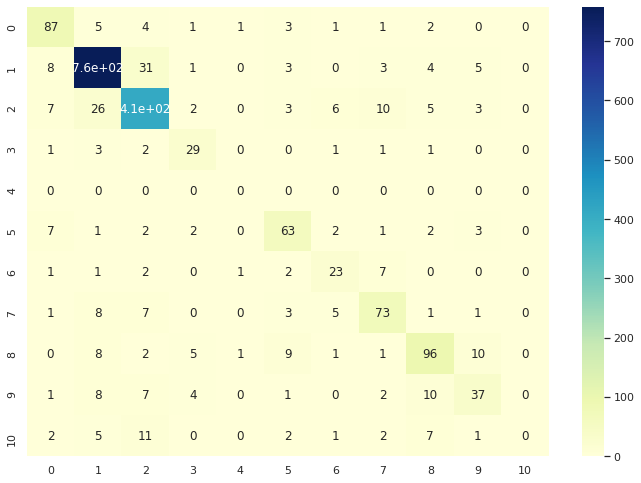

In [75]:
# Plot the training/validation accuracy and loss

pred_3=pred_to_class1(model3,x_test_i,y_test_i,num_classes=10)
matrix = confusion_matrix(y_test_i,pred_3)
ax = sns.heatmap(matrix,cmap="YlGnBu",annot=True)
print("Figure shows the confusion matrix for the test set.")

# Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Download and zip the folders "/content/drive/My Drive/Colab Notebooks/cifar/" (abc123_cifar_model.zip) and "/content/drive/My Drive/Colab Notebooks/reuters/" (abc123_reuters_model.zip) 
4.   Upload the .ipynb file and .zip on Blackboard



## Rubric

*   Computer Vision - CNN
    *   (20 points) Load/Prepare Data
    *   (20 points) CNN Model Creation
    *   (20 points) Training
    *   (15 points) Testing/Evaluation
    *   (10 points) EXTRA CREDIT - Model Performance - Accuracy
*   Natural Language Processing - RNN
    *   (20 points) Load/Prepare Data
    *   (20 points) RNN Model Creation
    *   (20 points) Training
    *   (15 points) Testing/Evaluation 

